In [2]:
import pandas as pd
# Reading data from a CSV file
#Remember to modify the fowlloing directory
data = pd.read_csv("/content/drive/MyDrive/a2/PaySim.csv")
# Displaying the first 5 rows of the dataset
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
#Preprocessing
# ===================
import numpy as np
# Generating descriptive statistics of the dataframe
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
# Deleting rows with any missing values
data = data.dropna()

<Axes: >

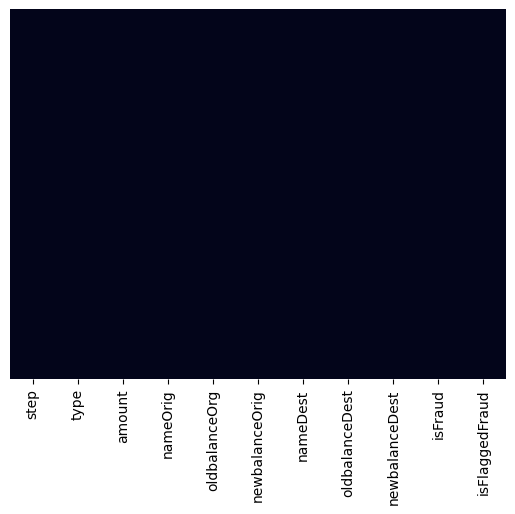

In [5]:
# Displaying a heatmap to show missing values in the dataset
import seaborn as sns
sns.heatmap(data.isnull(), yticklabels = False, cbar = False)

<Axes: xlabel='type', ylabel='count'>

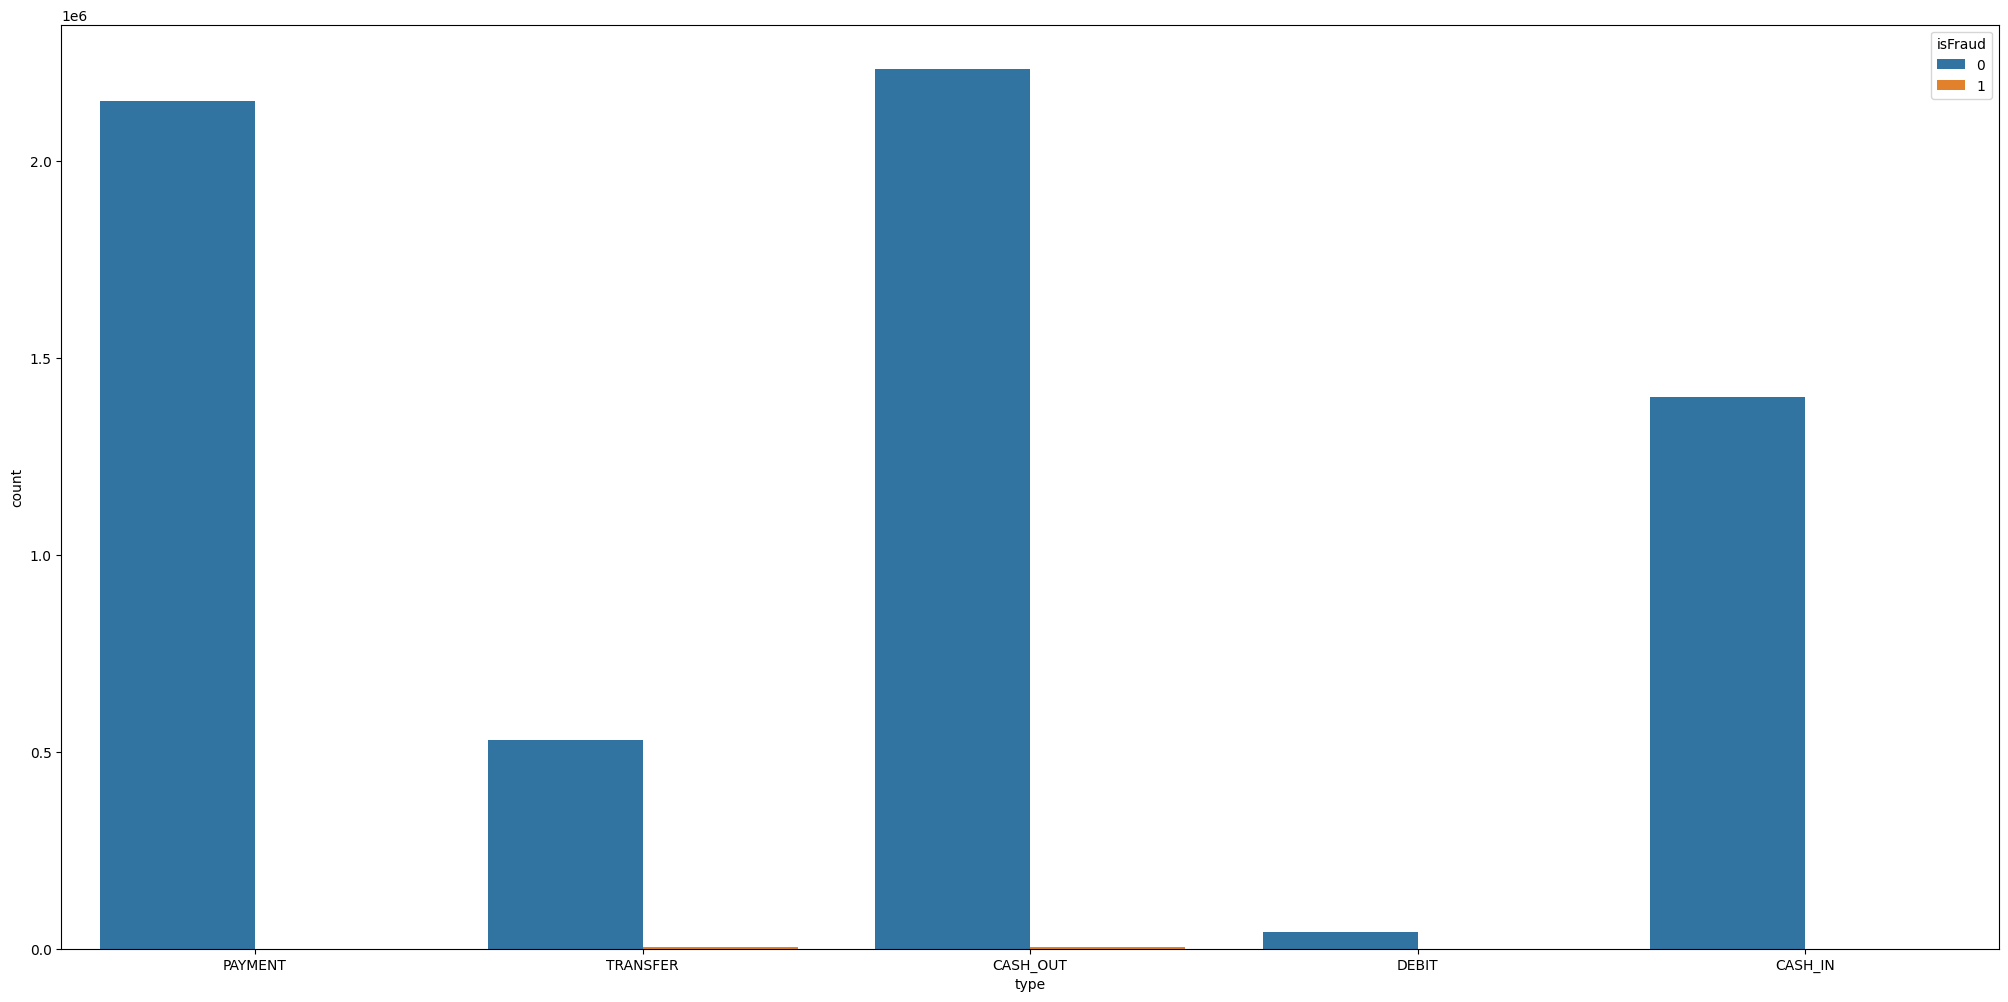

In [6]:
# Visualizations to understand data distribution
import matplotlib.pyplot as plt
plt.figure(figsize=[25, 12])
sns.countplot(x="type", hue="isFraud", data=data)

In [7]:
# Feature Engineering
# ===================
# Extracting relevant columns and converting "type" column to one-hot
#encoded format
data_extract = data[["type", "isFraud"]]
type_dummies = pd.get_dummies(data_extract["type"], drop_first=True)
data_extract.drop(["type"], axis=1, inplace=True)
data_extract.head()

<ipython-input-7-7243bfbce899>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_extract.drop(["type"], axis=1, inplace=True)


,isFraud
0,0
1,0
2,1
3,1
4,0


In [8]:
# Scaling the specified columns for model training
from sklearn.preprocessing import StandardScaler
col_names = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest",
"newbalanceDest"]
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns=col_names)
new_data = pd.concat([data_extract, type_dummies, scaled_features], axis=1,
ignore_index=False)
new_data.head()

,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,0,0,1,0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,0,0,0,1,0,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,1,0,0,0,1,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,1,1,0,0,0,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,0,0,0,1,0,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411


In [9]:
# Model Selection
# ===================
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [10]:
# Training
# ===================
# Defining features (X) and target variable (y)
X = new_data.iloc[:, new_data.columns != "isFraud"]
y = new_data.iloc[:, new_data.columns == "isFraud"]
X.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,0,1,0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,0,0,1,0,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,0,0,0,1,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,1,0,0,0,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,0,0,1,0,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411


In [15]:

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=0)

#X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=0)
#print("Training set:")
#print("X=",X_train.size, "Y=",y_train.size)
#print("Test sets:")
#print("X=", X_test.size, "Y=", y_test.size)
#print("Validating sets:")
#print("X=", X_val.size, "Y=", y_val.size)

In [16]:
# Training the classifier on the training data
decision_tree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [17]:
# Evaluation
# ===================
# Making predictions on the test data
y_pred = decision_tree.predict(X_test)

In [18]:
# Evaluating the model"s performance
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
# you can calculate other evalution metrics like fpr and tpr here.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.90      0.89      0.89      2419

    accuracy                           1.00   1908786
   macro avg       0.95      0.94      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



In [20]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
# Extract values from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR)
fpr = fp / (fp + tn)

# Calculate False Negative Rate (FNR)
fnr = fn / (fn + tp)

print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Confusion Matrix:
 [[1906116     251]
 [    266    2153]]
False Positive Rate (FPR): 0.0001
False Negative Rate (FNR): 0.1100
